In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing or loading the dataset
df = pd.read_csv('Abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [3]:
#Checing data types
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [4]:
df.shape

(4177, 9)

In [5]:
#Checking any null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
#Checking value counts of each category in catergorical type feature columns
print(df['Sex'].value_counts(),'\n')

M    1528
I    1342
F    1307
Name: Sex, dtype: int64 



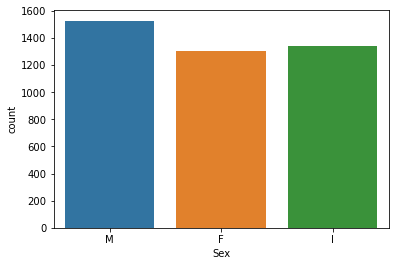

In [7]:
#Countplot for vizualization of value counts of categorical data
sns.countplot(df['Sex'])
plt.show()

We can see balanced categorical data

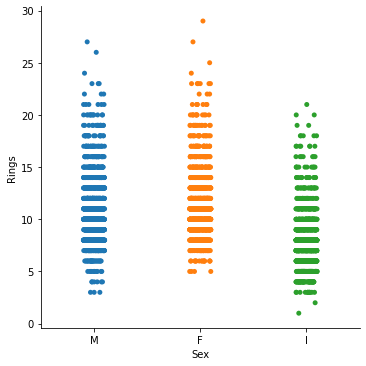

In [8]:
#Cat plot for vizualization of categorical data wrt to target
sns.catplot(x='Sex',y='Rings', data=df )
plt.show()

In [9]:
df_cont = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight']

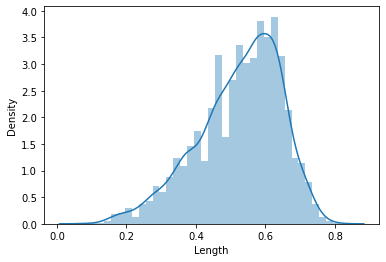

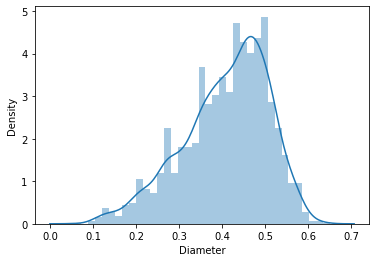

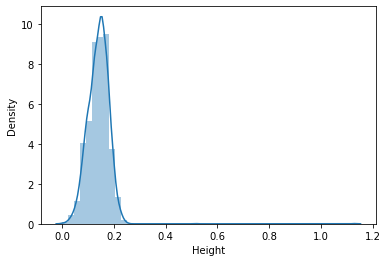

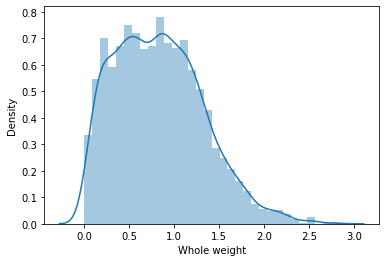

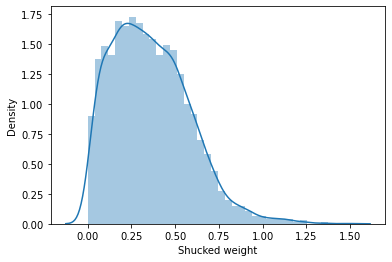

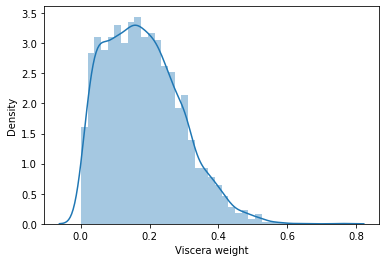

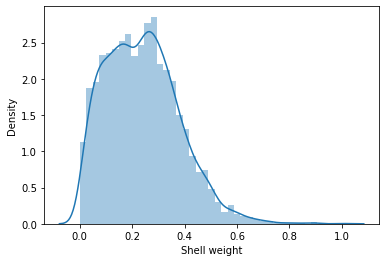

In [10]:
#Checking the distribution of continuous data
for i in df_cont:
    sns.distplot(df[i], kde=True)
    plt.show()

Legth and Diameter showing same kind of distribution with skewness

'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight' showing same with skewness

Height data is having higher skewness in its distribution

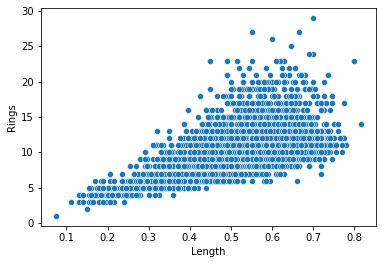

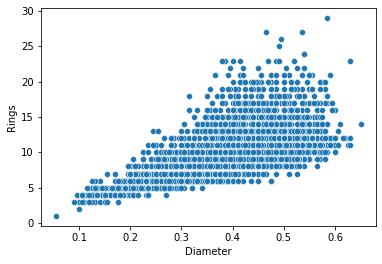

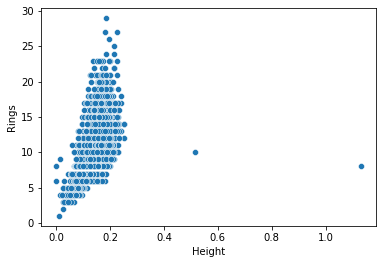

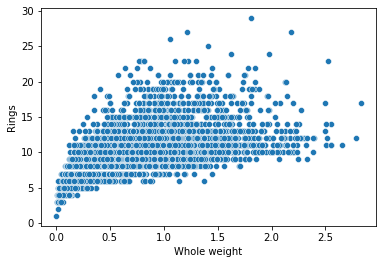

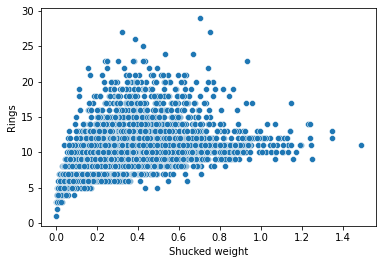

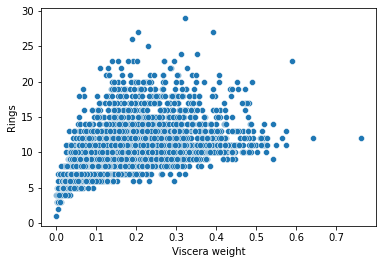

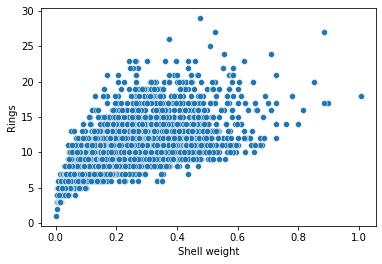

In [11]:
#Scatter plot to vizualize continuos features relationship with target variable
y = df['Rings']

for i in df_cont:
    x = df[i]
    sns.scatterplot(x, y, data=df)
    plt.show()

All of these input continuous feature columns showing positive relationship with target

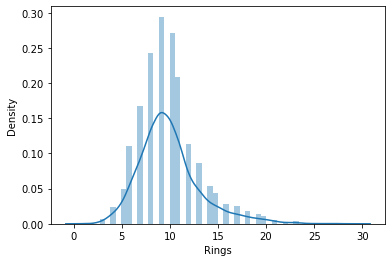

In [12]:
#Checking the distribution of continuous target data

sns.distplot(df['Rings'], kde=True)
plt.show()

As Sex has 3 categories we cannot use Onehot encoder, so we have to use binary encoder

In [13]:
#Encoding the categorical data

from category_encoders import BinaryEncoder

enc = BinaryEncoder()

df = enc.fit_transform(df)
df.head()

,Sex_0,Sex_1,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
#Statistical summary
df.describe()

,Sex_0,Sex_1,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.634187,0.687096,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.481715,0.463731,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,1.000000,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,1.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [15]:
df.corr()

,Sex_0,Sex_1,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex_0,1.000000,-0.512528,-0.236543,-0.240376,-0.215459,-0.252038,-0.251793,-0.242194,-0.235391,-0.181831
Sex_1,-0.512528,1.000000,-0.309666,-0.318626,-0.298421,-0.299741,-0.263991,-0.308444,-0.306319,-0.250279
Length,-0.236543,-0.309666,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.240376,-0.318626,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.215459,-0.298421,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.252038,-0.299741,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.251793,-0.263991,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.242194,-0.308444,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.235391,-0.306319,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.181831,-0.250279,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


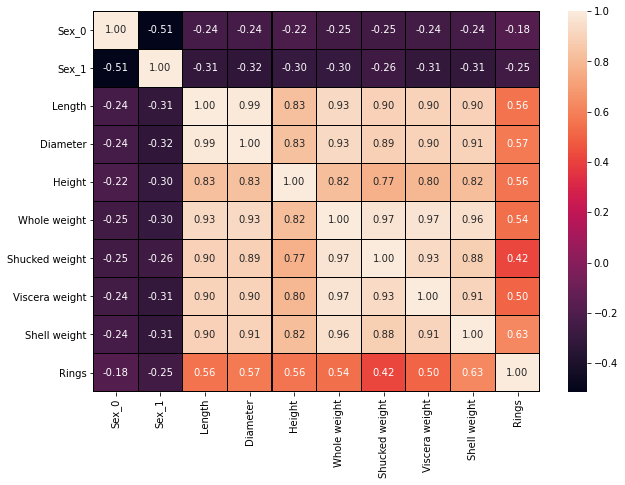

In [16]:
#Heatmap to vizualize correlation between different features
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

From the heat map we can observe that there exists collinearity between independent variable among themselves strongly

Need to handle this multicollinearity before training the model

In [17]:
#Sorting descending values of correlation data of target variable
df.corr()['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex_0            -0.181831
Sex_1            -0.250279
Name: Rings, dtype: float64

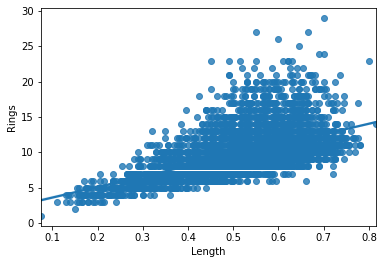

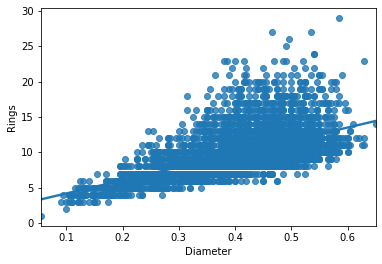

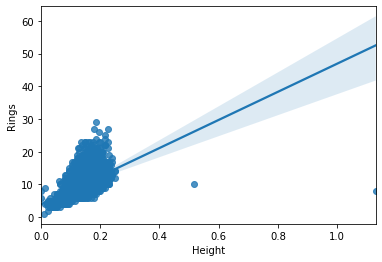

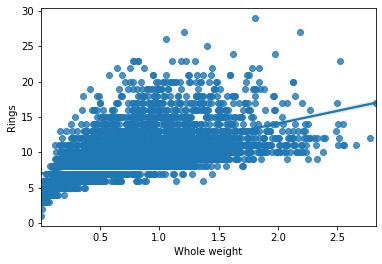

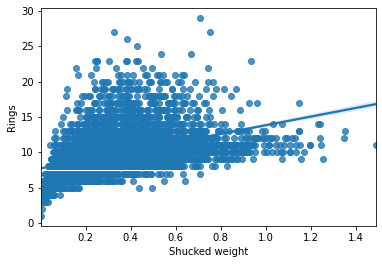

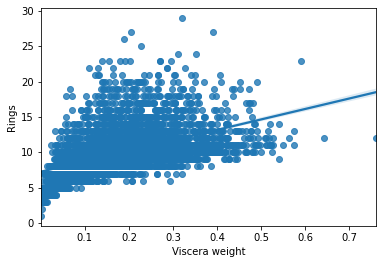

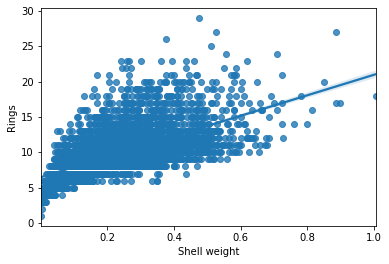

In [18]:
#Scatter plot to vizualize continuos features relationship with target variable
b = df['Rings']
a = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight']

for i in a:
    x = df[i]
    sns.regplot(x, b, data=df)
    plt.show()

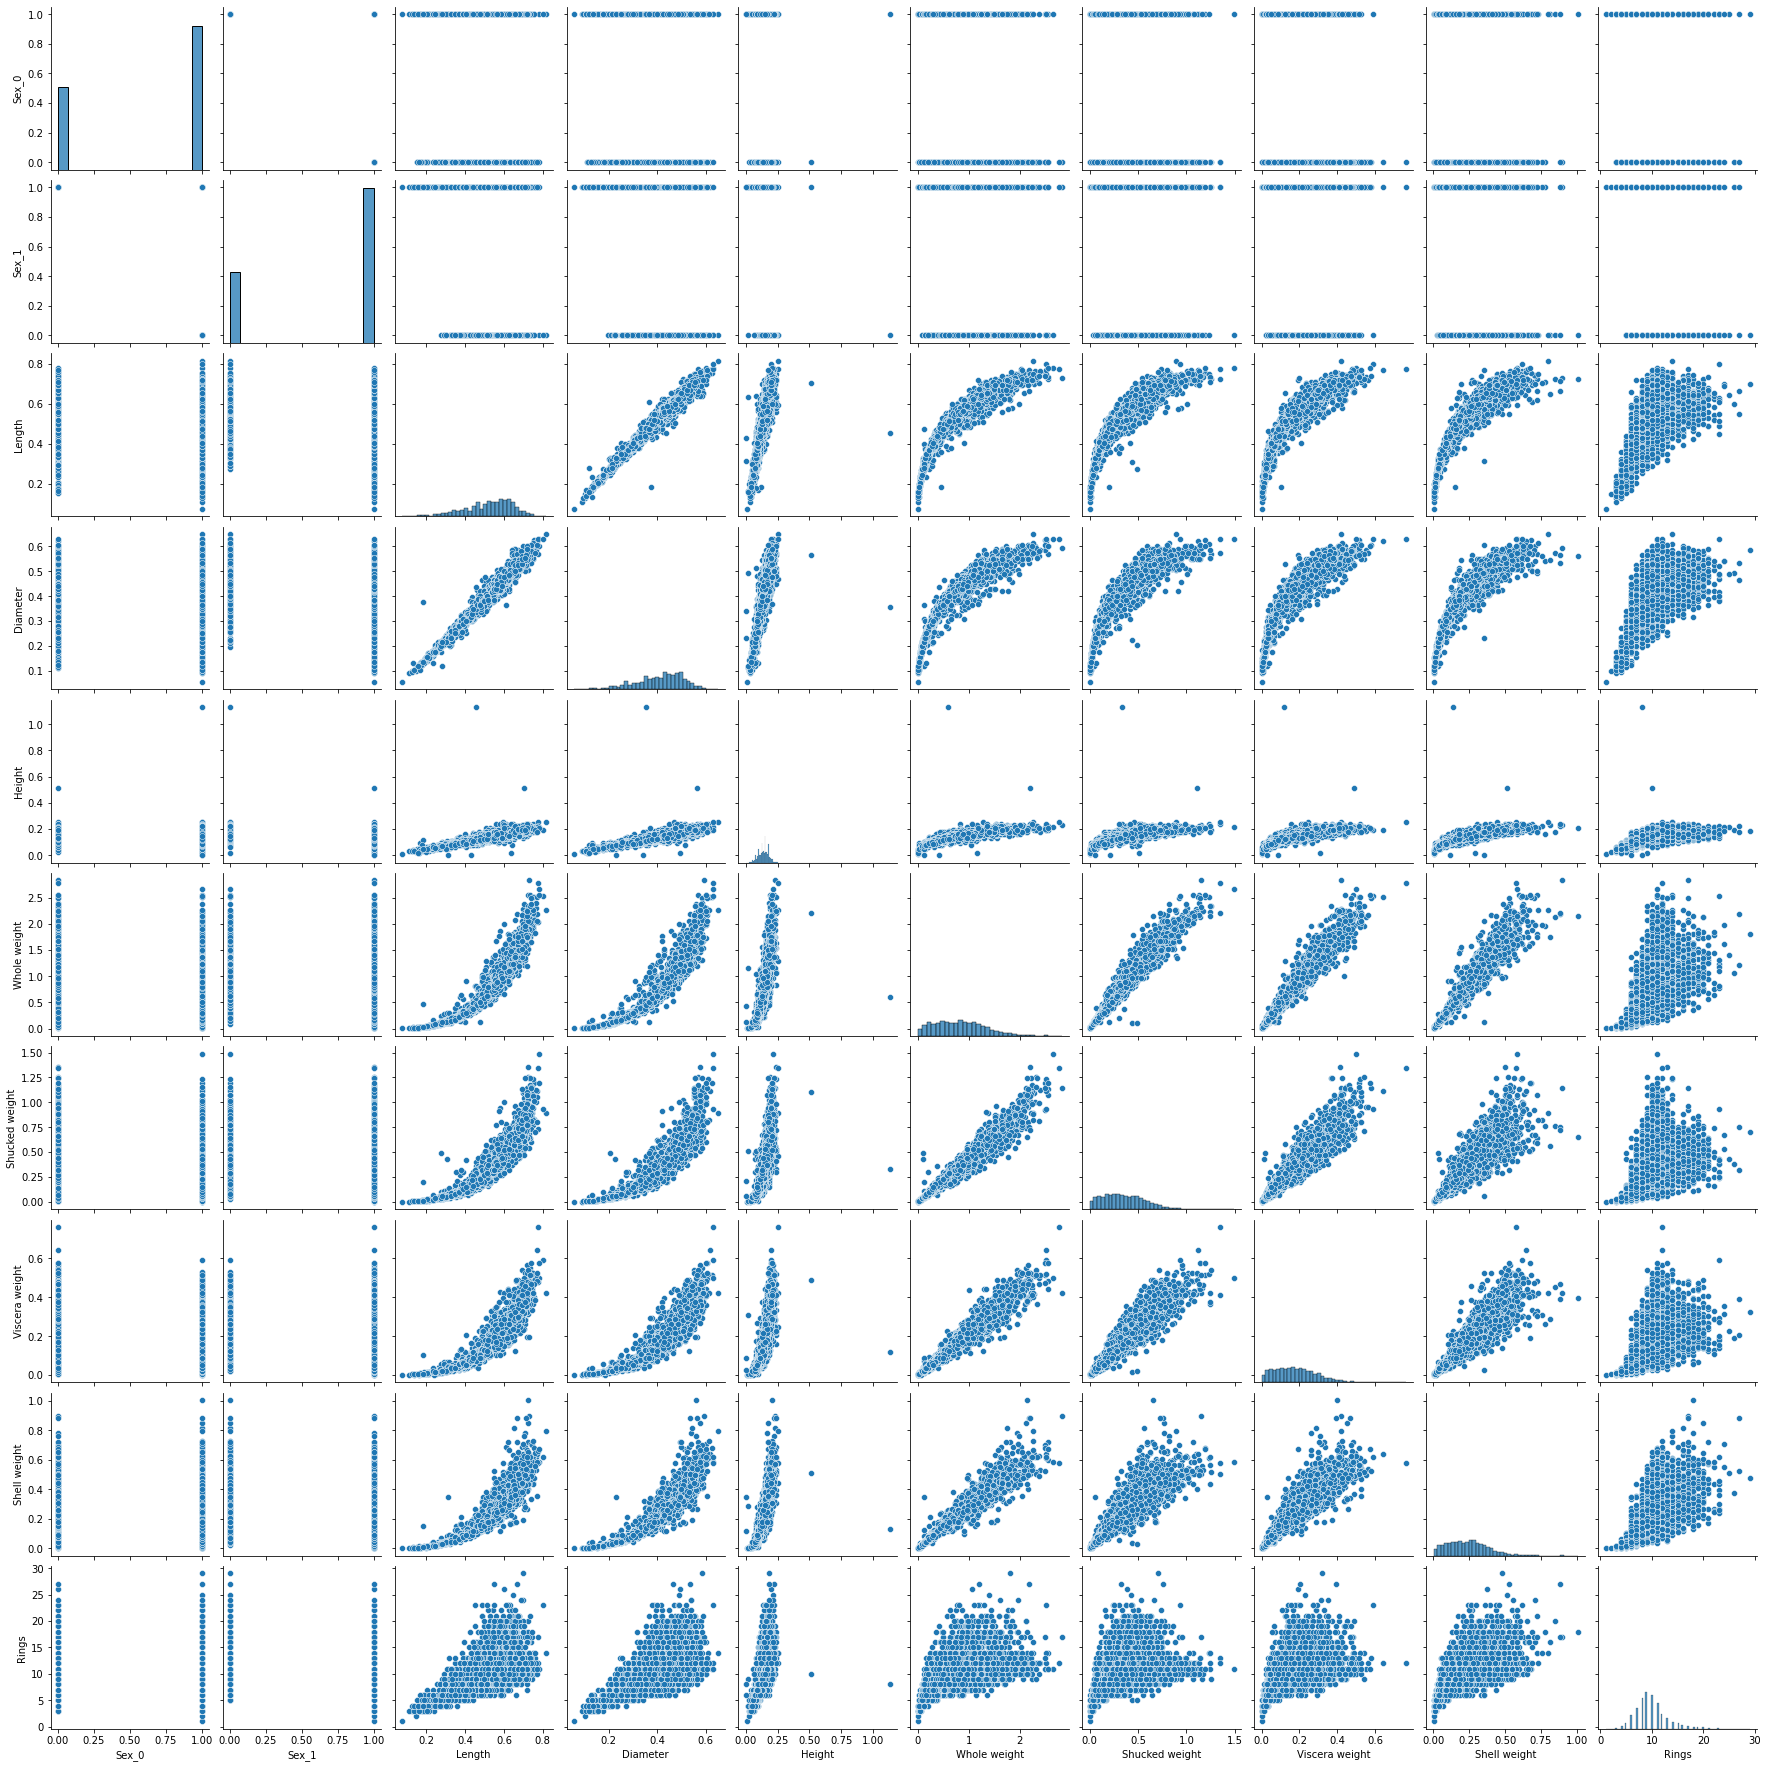

In [19]:
#Pairplot for observing interrelation between independent variable
sns.pairplot(df)
plt.show()

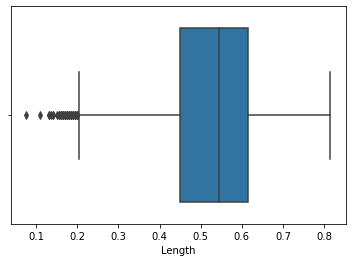

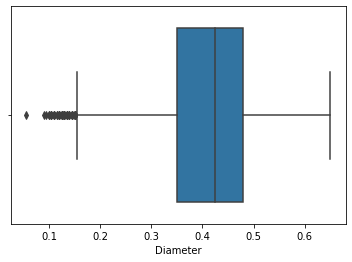

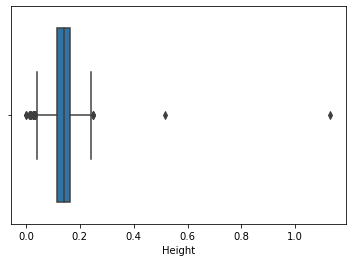

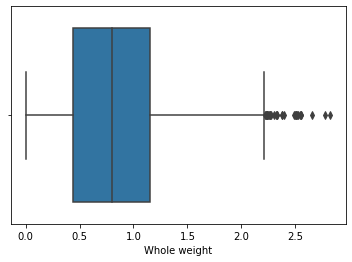

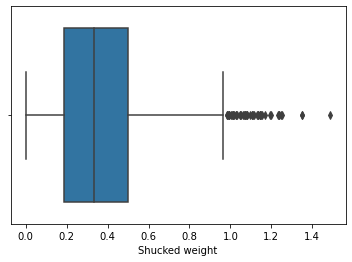

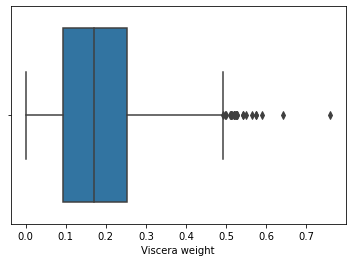

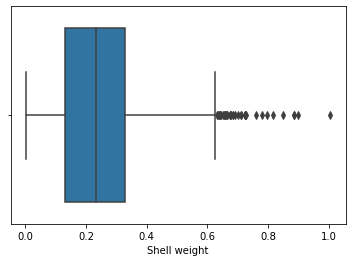

In [20]:
#Checking outliers in the data (continuous features only)
for i in df_cont:
    sns.boxplot(df[i])
    plt.show()

All features has outliers, lets remove outliers by zscore method

In [21]:
#Removing of outliers by zscore method
print(df.shape)

from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]
print(df_new.shape)

(4177, 10)
(4027, 10)


In [22]:
# Data loss %

data_lost = (4177-4027)*100/4177
data_lost

3.5910940866650707

In [23]:
#Seperate feature and target columns
x = df_new.drop('Rings',axis=1)
y = df_new['Rings']

In [24]:
#VIF method to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

[3.9578067556913203,
 4.686396769972034,
 765.849991831837,
 767.6373309232127,
 92.27360174833566,
 443.60077496599973,
 108.68894218069367,
 66.45228288513768,
 95.74942699708195]

High level of multicollinearity exists

VIF <5 was required

All continuous features are having 

Let us handle multicollinearity by PCA technique

Since deleting columns for handling multicollinearity can cause loss of huge amount of data

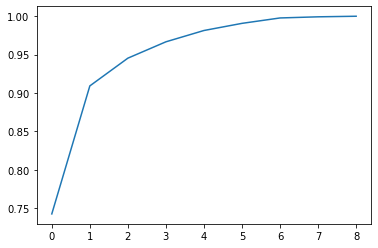

In [25]:
#PCA technique to handle multicollinearity

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_new = scaler.fit_transform(x) # Not essential as already data within range 0,1

pca = PCA()
pca.fit_transform(x_new)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

The explained_variance_ratio_ graph is saturating at approximately n = 6 from the above graph

In [26]:
pca = PCA(n_components=6)
new = pca.fit_transform(x_new)
PC = pd.DataFrame(new, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
x = PC

vif = pd.DataFrame()
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
print('VIF = ',vif,'\n')

print('skewness: \n',x.skew())

VIF =  [1.0000000000000004, 1.0, 1.0000000000000004, 1.0000000000000007, 0.9999999999999991, 0.9999999999999989] 

skewness: 
 PC1   -0.073708
PC2    0.027018
PC3    0.186954
PC4    0.411872
PC5   -0.429910
PC6    0.455670
dtype: float64


Thus problem of multicollinearity resolved VIF<5 

Also no skewness present in x data is acceptable +-0.5 limit

In [27]:
# Linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

for i in range(0,1000):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.2)
    lr.fit(xtr,ytr)
    predytr = lr.predict(xtr)
    predyt = lr.predict(xt)
    
    if round(r2_score(ytr,predytr)*100,1) == round(r2_score(yt,predyt)*100,1):
             print('At RS',i,'Model preforms well')
             print('Test score =',(r2_score(yt,predyt)*100),'\n')

At RS 38 Model preforms well
Test score = 50.94650395597821 

At RS 181 Model preforms well
Test score = 50.880783171531995 

At RS 226 Model preforms well
Test score = 50.92579249281195 

At RS 492 Model preforms well
Test score = 50.936684895370846 

At RS 525 Model preforms well
Test score = 50.85971796066637 

At RS 638 Model preforms well
Test score = 50.86021813818282 

At RS 797 Model preforms well
Test score = 50.898713217498745 

At RS 887 Model preforms well
Test score = 50.910745019352774 

At RS 894 Model preforms well
Test score = 50.87297879504139 

At RS 916 Model preforms well
Test score = 50.85422509404932 

At RS 968 Model preforms well
Test score = 50.92528762814813 



In [28]:
xtr, xt, ytr, yt = train_test_split(x,y, random_state=38,test_size=0.2)
lr.fit(xtr,ytr)

predytr = lr.predict(xtr)
predyt = lr.predict(xt)

print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.5094650395597821 

Mean absolute error = 1.5023706881194567 

Mean squared error = 4.112301372320419 



In [29]:
#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score

predyt = lr.predict(xt)
lss = r2_score(yt, predyt)

lsc = cross_val_score(lr,x,y,cv=3)
lsc = lsc.mean()
print('At CV =',3)
print('CV score =',lsc)
print('r2_score of test =',lss)

At CV = 3
CV score = 0.49370983412295605
r2_score of test = 0.5094650395597821


Here CV score almost equal to test score, so no problem of overfitting

Let us try other algorithms and Hyper parameter tuning (not required)

In [30]:
# Lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

model = Lasso()

parameters = {'alpha':[0.0001,0.001, 0.01,0.1, 1, 10], 'random_state':list(range(0,20))}

gsv = GridSearchCV(model, parameters)

gsv.fit(xtr,ytr)

print(gsv.best_estimator_)

model = (gsv.best_estimator_)
model.fit(xtr,ytr)
predyt = model.predict(xt)

testscore = r2_score(yt, predyt)
print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Lasso(alpha=0.0001, random_state=0)
Test score = 0.5094693885839144 

Mean absolute error = 1.502355427261084 

Mean squared error = 4.112264913149615 



In [31]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(xtr,ytr)
predyt = model.predict(xt)

testscore = r2_score(yt, predyt)

print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.5309497979193525 

Mean absolute error = 1.447481389578164 

Mean squared error = 3.9321882133995034 



In [32]:
# Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(xtr,ytr)
predyt = model.predict(xt)

testscore = r2_score(yt, predyt)

print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.027518259420101665 

Mean absolute error = 2.053349875930521 

Mean squared error = 8.152605459057073 



In [33]:
# Support vector regressor
from sklearn.svm import SVR

model = SVR()

model.fit(xtr,ytr)
predyt = model.predict(xt)

testscore = r2_score(yt, predyt)

print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.5361098106252817 

Mean absolute error = 1.395458874744811 

Mean squared error = 3.888930282684961 



In [34]:
# Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(xtr,ytr)
predyt = model.predict(xt)

testscore = r2_score(yt, predyt)

print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.5505993848230124 

Mean absolute error = 1.4181051957935633 

Mean squared error = 3.7674598459923487 



In [35]:
# KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

model.fit(xtr,ytr)
predyt = model.predict(xt)

testscore = r2_score(yt, predyt)

print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.4876200755293749 

Mean absolute error = 1.5193548387096774 

Mean squared error = 4.295434243176179 



In [36]:
# KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

model.fit(xtr,ytr)
predyt = model.predict(xt)

testscore = r2_score(yt, predyt)

print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.4876200755293749 

Mean absolute error = 1.5193548387096774 

Mean squared error = 4.295434243176179 



Gradient Boost regressor is giving best results with

Test score = 0.5492252092139489 (maximum)

Mean absolute error = 1.4207401031127729 (minimum)

Mean squared error = 3.7789799713630057  (minimum)

Let us tune the parameters

In [39]:
# Hyper parameter tuning of Gradient boosting regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

parameters = {'criterion':['friedman_mse', 'squared_error', 'mae','mse'],
              #'n_estimators':[50,100,150]#, 
              'max_depth' : [4,6,8,10]}

gsv = GridSearchCV(gbr, parameters)

gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

GradientBoostingRegressor(criterion='squared_error', max_depth=4)


In [50]:
gbr = GradientBoostingRegressor(criterion='friedman_mse', max_depth=4, n_estimators=50)
gbr.fit(xtr,ytr)
predyt = gbr.predict(xt)

testscore = r2_score(yt, predyt)

print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.5428803161387328 

Mean absolute error = 1.4228117213079645 

Mean squared error = 3.8321711088041 



In [57]:
#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score

predyt = gbr.predict(xt)
lss = r2_score(yt, predyt)

lsc = cross_val_score(gbr,x,y,cv=2)
lsc = lsc.mean()
print('At CV =',2)
print('CV score =',lsc)
print('r2_score of test =',lss)

At CV = 2
CV score = 0.5219956083405352
r2_score of test = 0.5428803161387328


Here CV score almost equal to test score, so no problem of overfitting

In [ ]:
import pickle
filename='abalone_rings.pkl'
pickle.dump(ls,open(filename,'wb'))